In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
def load_and_process_data(file_path, start_date_str='2022-01-01'):
    # Load the pickled DataFrame
    with open(file_path, 'rb') as file:
        loaded_df = pickle.load(file)
    
    # Add Timestep column
    loaded_df['Timestep'] = loaded_df.index + 1

    # Convert start_date_str to datetime
    start_date = pd.to_datetime(start_date_str)

    # Add Date column
    loaded_df['Date'] = start_date

    # Update Date based on Timestep
    for timestep in range(1, loaded_df['Timestep'].max() + 1):
        loaded_df.loc[loaded_df['Timestep'] == timestep, 'Date'] = start_date + pd.DateOffset(months=timestep - 1)

    return loaded_df

In [3]:
def plot_household_heating(df, title):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Add a background grid
    sns.set_style('darkgrid')
    sns.set(style="darkgrid", rc={"grid.color": "0.1", "grid.linewidth": 0.5})

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot oil, electric, gas, and hp as different lines
    plt.plot(df['Date'], df['oil'], label='Oil', marker='o')
    plt.plot(df['Date'], df['electric'], label='Electric', marker='o')
    plt.plot(df['Date'], df['solid'], label='Solid', marker='o')  # Corrected label 'solid' to 'Solid'
    plt.plot(df['Date'], df['hp'], label='HP', marker='o')

    # Set labels and title with larger font size
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Households', fontsize=14)
    plt.title('Household Heating System by Type Over Time\n(' + title + ')', fontsize=16)  # Updated title format and font size

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=12)

    # Set legend with larger font size
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [4]:
def plot_household_heating_ban(df, title):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Add a background grid
    sns.set_style('darkgrid')
    sns.set(style="darkgrid", rc={"grid.color": "0.1", "grid.linewidth": 0.5})

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot oil, electric, gas, and hp as different lines
    plt.plot(df['Date'], df['oil'], label='Oil', marker='o')
    plt.plot(df['Date'], df['electric'], label='Electric', marker='o')
    plt.plot(df['Date'], df['solid'], label='Solid', marker='o')  # Corrected label 'solid' to 'Solid'
    plt.plot(df['Date'], df['hp'], label='HP', marker='o')

    # Set labels and title with larger font size
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Households', fontsize=14)
    plt.title('Household Heating System by Type Over Time\n(' + title + ')', fontsize=16)  # Updated title format and font size

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=12)

    # Set legend with larger font size
    plt.legend(fontsize=12)

    # Add a vertical dashed line at 2030 with a red color
    plt.axvline(x=pd.to_datetime('2030-01-01'), color='red', linestyle='--', label='Ban')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [5]:
def plot_household_heating_ban_late(df, title):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Add a background grid
    sns.set_style('darkgrid')
    sns.set(style="darkgrid", rc={"grid.color": "0.1", "grid.linewidth": 0.5})

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot oil, electric, gas, and hp as different lines
    plt.plot(df['Date'], df['oil'], label='Oil', marker='o')
    plt.plot(df['Date'], df['electric'], label='Electric', marker='o')
    plt.plot(df['Date'], df['solid'], label='Solid', marker='o')  # Corrected label 'solid' to 'Solid'
    plt.plot(df['Date'], df['hp'], label='HP', marker='o')

    # Set labels and title with larger font size
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Households', fontsize=14)
    plt.title('Household Heating System by Type Over Time\n(' + title + ')', fontsize=16)  # Updated title format and font size

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=12)

    # Set legend with larger font size
    plt.legend(fontsize=12)

    # Add a vertical dashed line at 2030 with a red color
    plt.axvline(x=pd.to_datetime('2035-01-01'), color='red', linestyle='--', label='Ban')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [6]:
baseline = load_and_process_data('baseline.pickle')
subsidy_75 = load_and_process_data('subsidy_75.pickle')
subsidy_90 = load_and_process_data('subsidy_90.pickle')
ban = load_and_process_data('ban.pickle')
ban_subsidy_75 = load_and_process_data('ban_subsidy_75.pickle')
ban_subsidy_90 = load_and_process_data('ban_subsidy_90.pickle')
ban_late = load_and_process_data('ban_late.pickle')
ban_late_subsidy_75 = load_and_process_data('ban_late_subsidy_75.pickle')
ban_late_subsidy_90 = load_and_process_data('ban_late_subsidy_90.pickle')

# Baseline

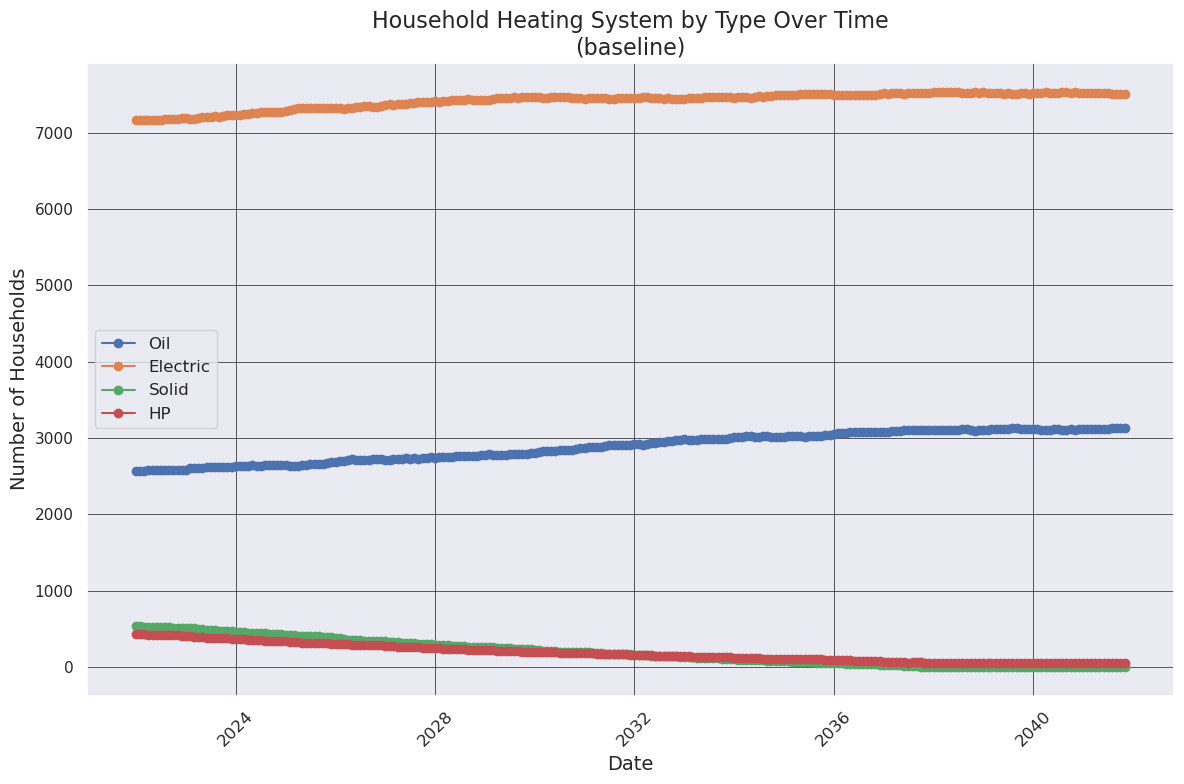

In [7]:
plot_household_heating(baseline, 'baseline')

# 75% Subsidy

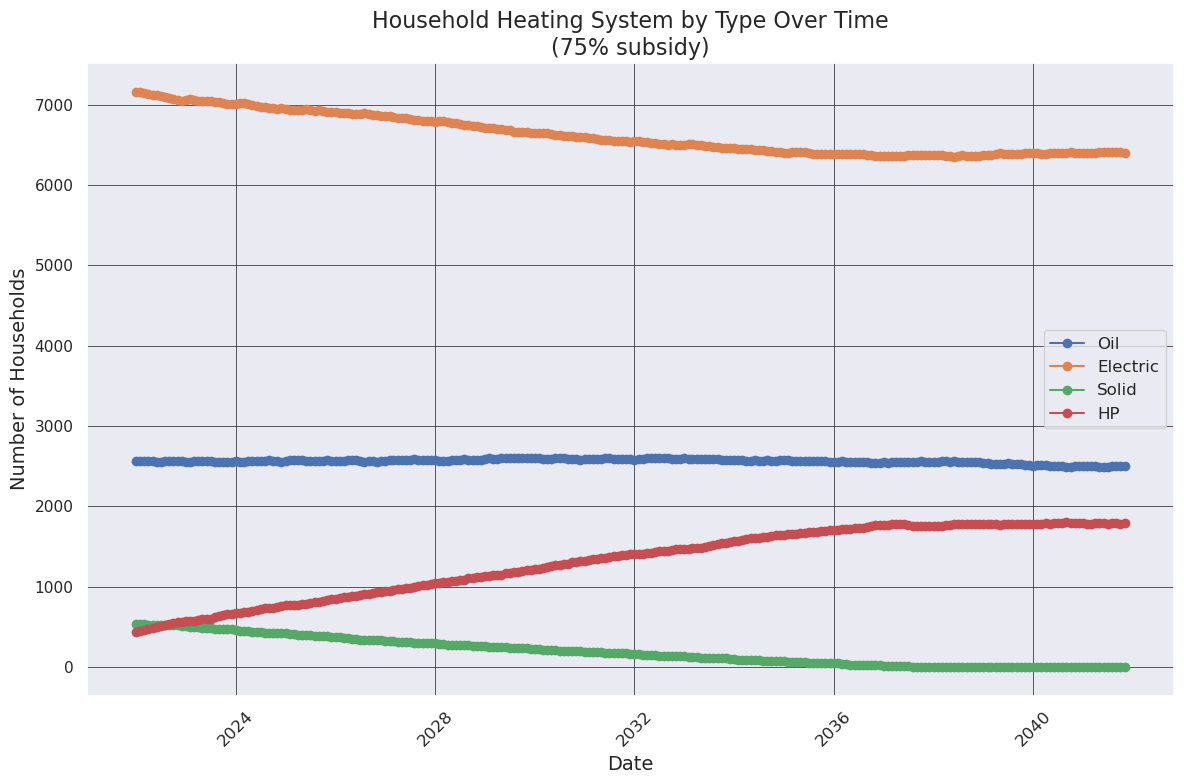

In [8]:
plot_household_heating(subsidy_75, '75% subsidy')

# 90% Subsidy

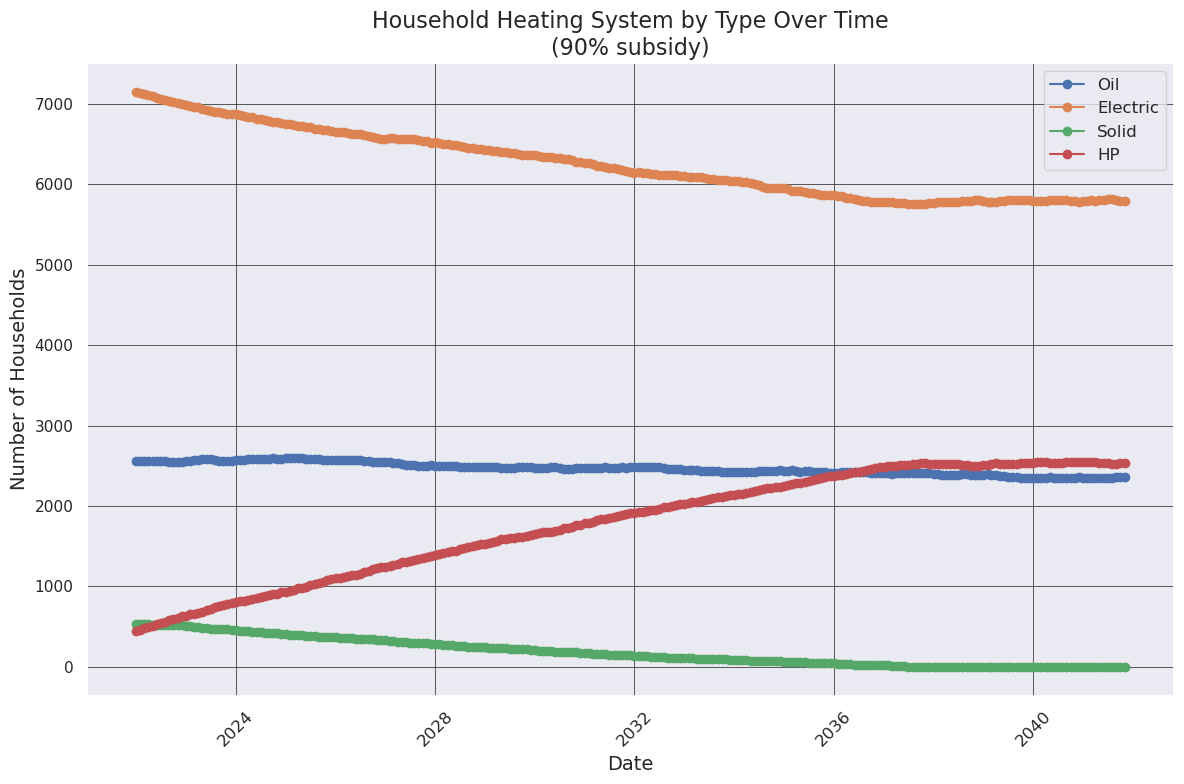

In [9]:
plot_household_heating(subsidy_90, '90% subsidy')

# Ban

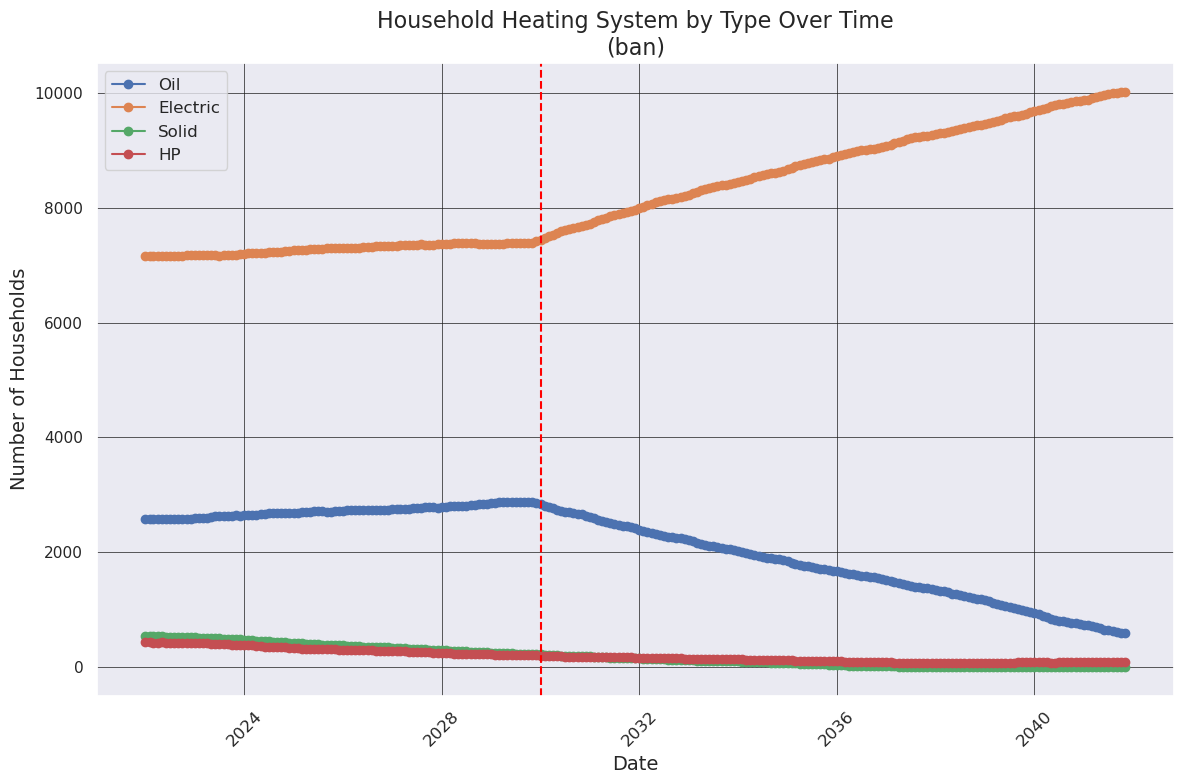

In [10]:
plot_household_heating_ban(ban, 'ban')

# Ban, 75% subsidy

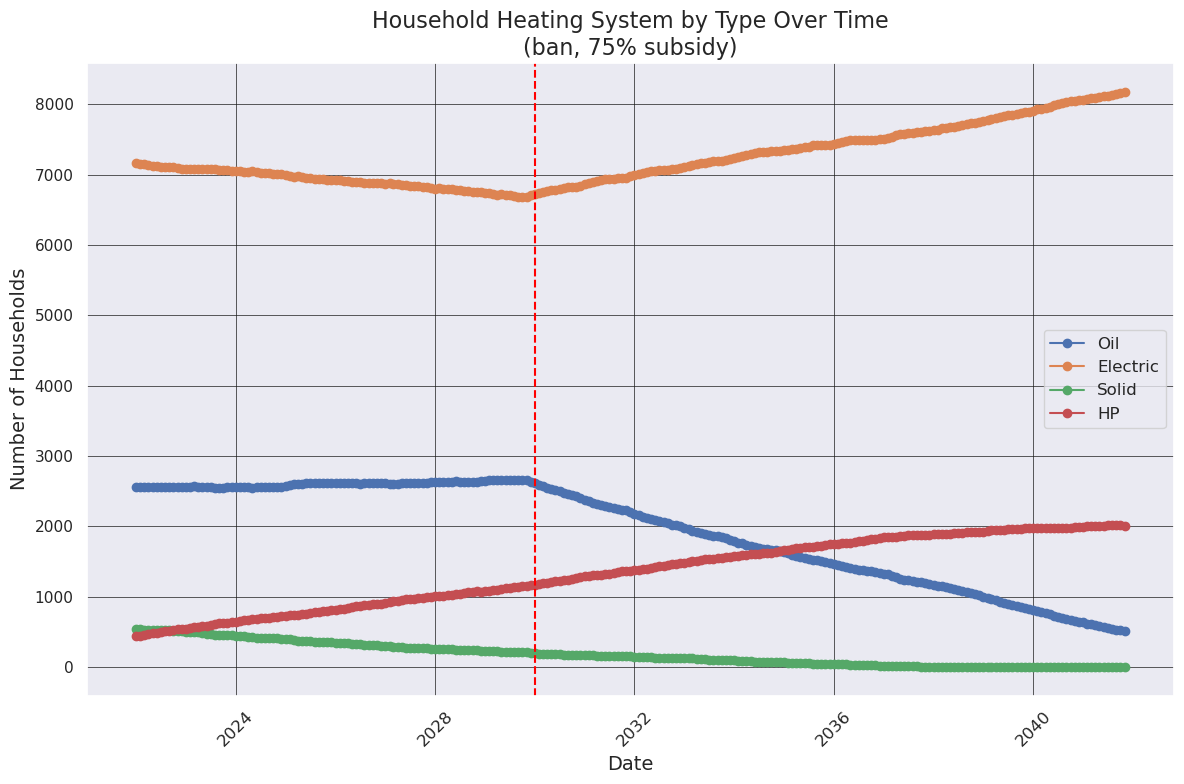

In [11]:
plot_household_heating_ban(ban_subsidy_75, 'ban, 75% subsidy')

# Ban, 90% subsidy

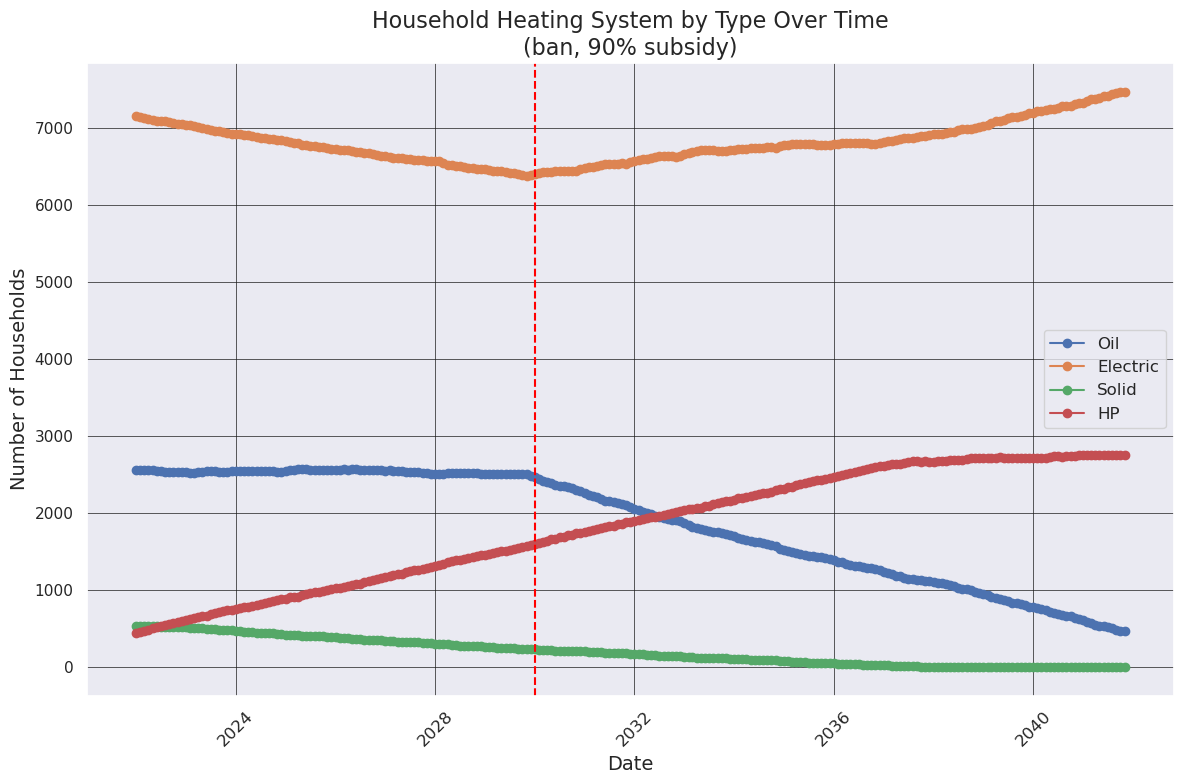

In [12]:
plot_household_heating_ban(ban_subsidy_90, 'ban, 90% subsidy')

# Late Ban

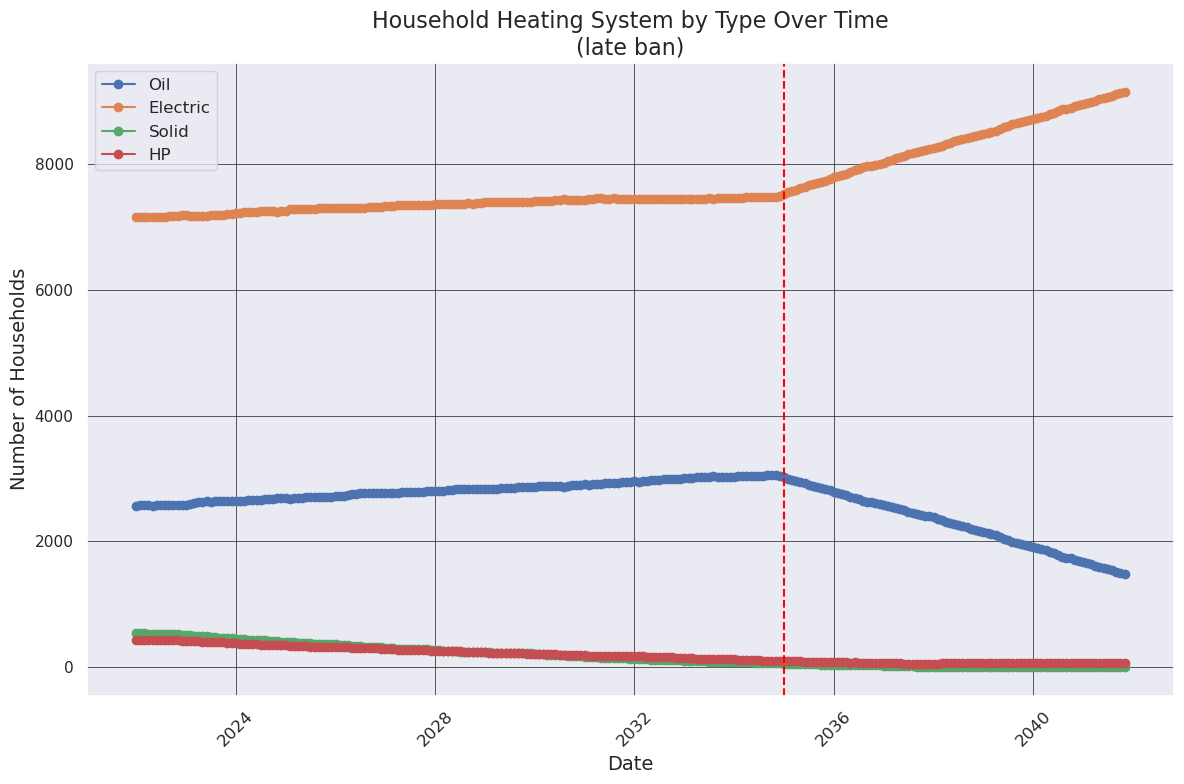

In [13]:
plot_household_heating_ban_late(ban_late, 'late ban')

# Late Ban, 75% subsidy

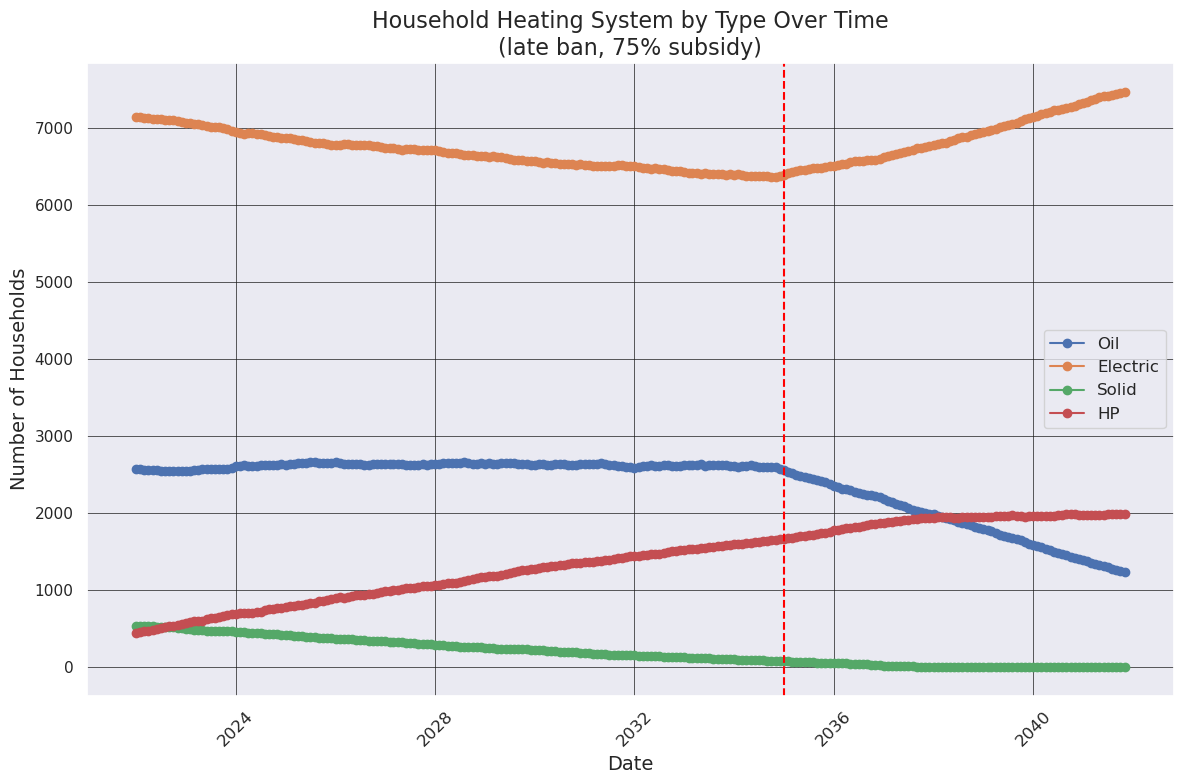

In [14]:
plot_household_heating_ban_late(ban_late_subsidy_75, 'late ban, 75% subsidy')

# Late Ban, 90% subsidy

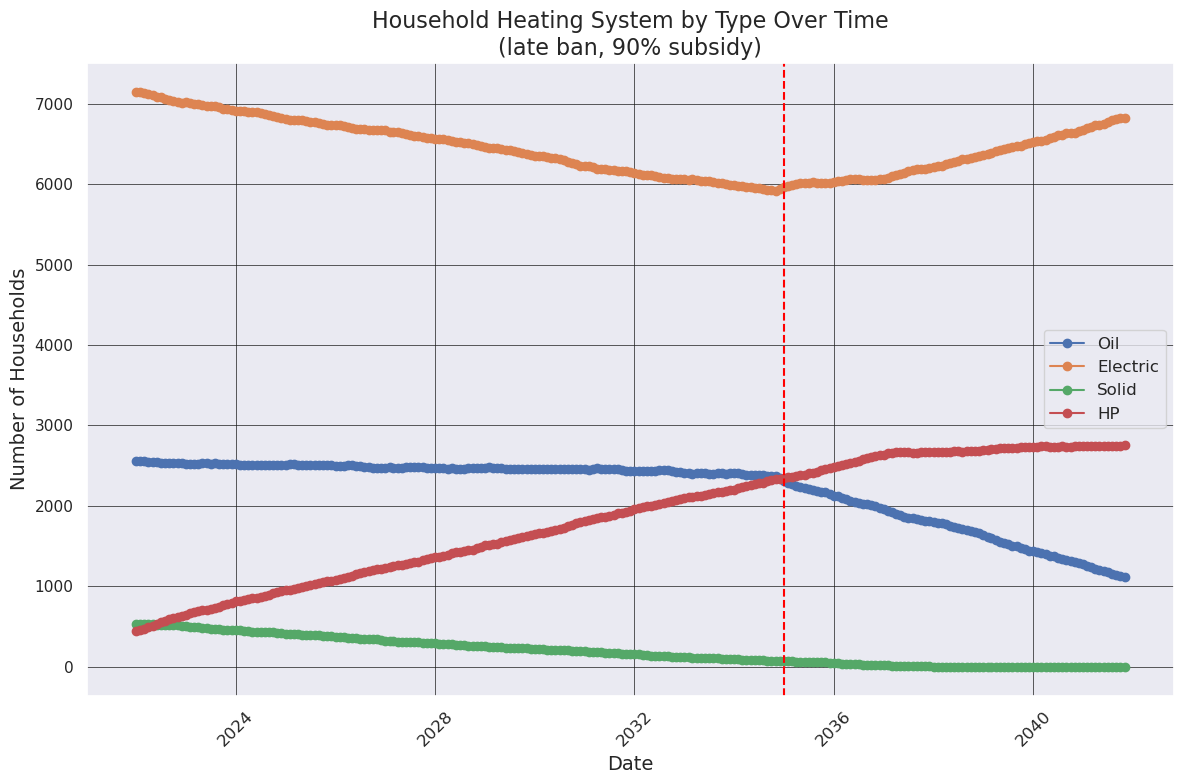

In [16]:
plot_household_heating_ban_late(ban_late_subsidy_90, 'late ban, 90% subsidy')